# Analyze LL Scan

In [50]:
%matplotlib notebook

In [41]:
# imports
import os
import numpy as np

import pandas

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

from ulmo import io as ulmo_io
from ulmo.plotting import load_palette, grid_plot

# Init

In [10]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Load

In [5]:
dpath = '/home/xavier/Projects/Oceanography/AI/OOD/Scan'

In [6]:
prob_file = os.path.join(dpath, 'LL_map_log_prob.csv')

In [7]:
results = pandas.read_csv(prob_file)

In [8]:
results.head()

,filename,row,column,latitude,longitude,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,log_likelihood
0,/home/xavier/Projects/Oceanography/AI/OOD/Scan...,255,997,40.260590,-58.801544,0.000793,18.232616,14.014999,23.025000,22.414999,14.839999,-1576.56500
1,/home/xavier/Projects/Oceanography/AI/OOD/Scan...,452,847,38.945446,-61.627983,0.005737,22.902092,18.584999,24.764999,24.264999,21.709999,-565.26830
2,/home/xavier/Projects/Oceanography/AI/OOD/Scan...,441,652,39.419600,-63.931650,0.000000,22.239235,15.804999,26.074999,25.400000,18.125000,-3173.80760
3,/home/xavier/Projects/Oceanography/AI/OOD/Scan...,1568,334,29.910753,-70.240326,0.045227,26.470572,23.844999,28.174999,27.215000,25.859999,241.13293
4,/home/xavier/Projects/Oceanography/AI/OOD/Scan...,1545,479,29.898064,-68.531910,0.031189,26.263012,23.430000,27.945000,27.055000,25.670000,196.53076


# Explore

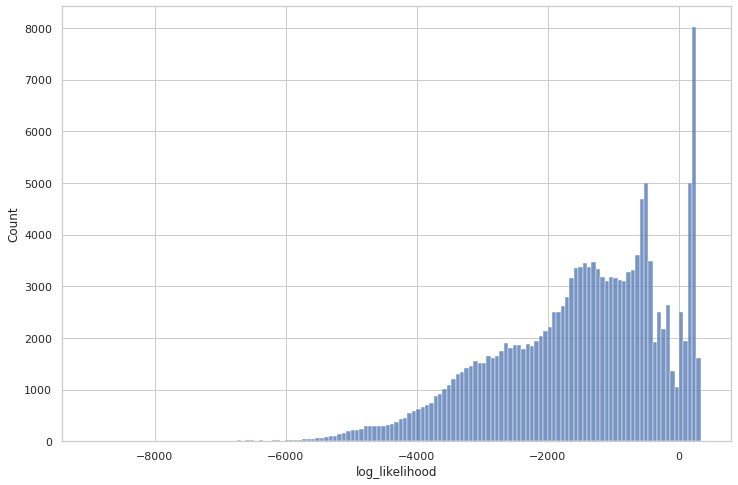

In [13]:
fig = plt.figure(figsize=(12,8))
ax=plt.gca()
_ = sns.histplot(data=results, x='log_likelihood', ax=ax)

# Map time

## Data first

In [14]:
data_file = os.path.join(dpath, 'AQUA_MODIS.20100619T062008.L2.SST.nc')

In [35]:
sst_orig, qual, latitude, longitude = ulmo_io.load_nc(data_file)

In [23]:
nadir_offset=480

In [36]:
# Restrict to near nadir
nadir_pix = sst.shape[1] // 2
lb = nadir_pix - nadir_offset
ub = nadir_pix + nadir_offset
sst = sst_orig[:, lb:ub]
#masks = masks[:, lb:ub].astype(np.uint8)

In [18]:
pal, cm = load_palette()

<AxesSubplot:>

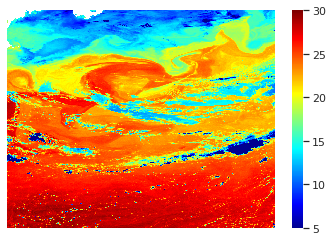

In [27]:
#fig = plt.figure(figsize=(8))
sns.heatmap(sst, xticklabels=[], yticklabels=[], cmap=cm, vmin=5, vmax=30)

In [28]:
sst.shape

(2030, 960)

## LL

In [32]:
results.head()

,filename,row,column,latitude,longitude,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,log_likelihood
0,/home/xavier/Projects/Oceanography/AI/OOD/Scan...,255,997,40.260590,-58.801544,0.000793,18.232616,14.014999,23.025000,22.414999,14.839999,-1576.56500
1,/home/xavier/Projects/Oceanography/AI/OOD/Scan...,452,847,38.945446,-61.627983,0.005737,22.902092,18.584999,24.764999,24.264999,21.709999,-565.26830
2,/home/xavier/Projects/Oceanography/AI/OOD/Scan...,441,652,39.419600,-63.931650,0.000000,22.239235,15.804999,26.074999,25.400000,18.125000,-3173.80760
3,/home/xavier/Projects/Oceanography/AI/OOD/Scan...,1568,334,29.910753,-70.240326,0.045227,26.470572,23.844999,28.174999,27.215000,25.859999,241.13293
4,/home/xavier/Projects/Oceanography/AI/OOD/Scan...,1545,479,29.898064,-68.531910,0.031189,26.263012,23.430000,27.945000,27.055000,25.670000,196.53076


In [37]:
LL_map = np.zeros_like(sst_orig) + np.nan

In [38]:
for _, rrow in results.iterrows():
    LL_map[rrow.row, rrow.column] = rrow.log_likelihood

In [43]:
np.median(results.row)

379.0

In [54]:
imin = np.argmin(results.log_likelihood)

In [55]:
results.iloc[imin]

filename            /home/xavier/Projects/Oceanography/AI/OOD/Scan...
row                                                               423
column                                                            715
latitude                                                      39.4658
longitude                                                    -63.1504
clear_fraction                                                      0
mean_temperature                                               19.794
Tmin                                                           16.255
Tmax                                                           25.845
T90                                                            24.265
T10                                                            17.095
log_likelihood                                                -8957.6
Name: 68603, dtype: object

<IPython.core.display.Javascript object>


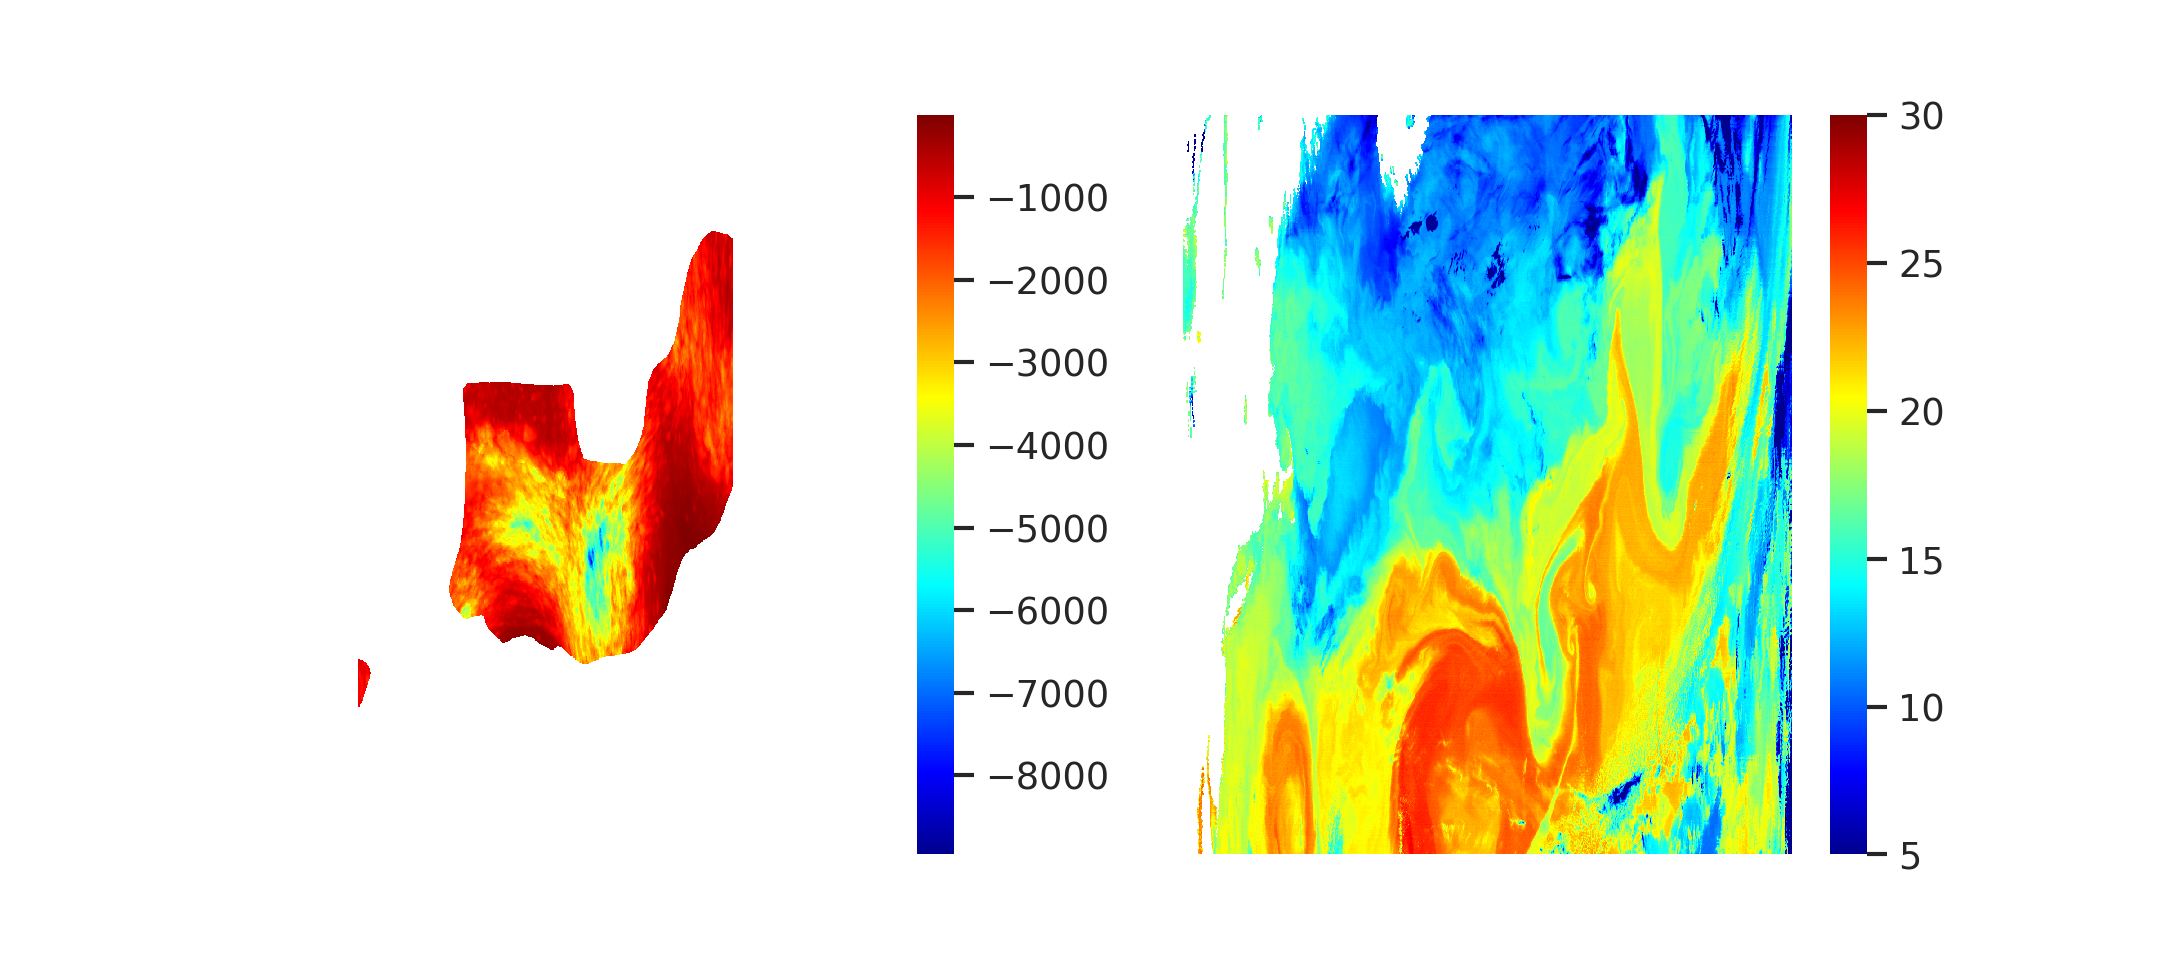

<AxesSubplot:>

In [53]:
fig = plt.figure(figsize=(9,4))
gs = gridspec.GridSpec(1,2)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

sns.heatmap(LL_map[0:700,:], xticklabels=[], yticklabels=[], cmap=cm, ax=ax0)#, vmin=5, vmax=30)
sns.heatmap(sst_orig[0:700,:], xticklabels=[], yticklabels=[], cmap=cm, vmin=5, vmax=30, ax=ax1)
#
#plt.show()